<a href="https://colab.research.google.com/github/manoj1234-ms/webiste-analysis/blob/main/Customer_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"manojsharmaji","key":"53862aa066767ffa5faa6c216524395f"}'}

In [4]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json # Set permissions for security

In [6]:
! kaggle datasets download -d bhanupratapbiswas/customer-behavior-analysis

Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/customer-behavior-analysis
License(s): MIT
customer-behavior-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
import zipfile
import os

# 1. Define the name of the downloaded ZIP file
# It usually matches the dataset slug, replacing '/' with '-' and ending with .zip
zip_file_name = 'customer-behavior-analysis.zip'

# 2. Define a folder to extract the contents into
target_dir = 'customer_data'

# Create the folder if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# 3. Unzip the file contents into the target folder
try:
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall(target_dir)
        print(f"✅ Successfully extracted data to the folder: **{target_dir}**")

except FileNotFoundError:
    print(f"❌ Error: The file '{zip_file_name}' was not found.")
    print("Please check if the Kaggle download command finished successfully.")

✅ Successfully extracted data to the folder: **customer_data**


In [8]:
import os

target_dir = 'customer_data' # The folder where the files were extracted

print(f"Files available in the extracted directory ('{target_dir}'):")
# Loop through the contents of the directory
for file_name in os.listdir(target_dir):
    print(f"- {file_name}")

Files available in the extracted directory ('customer_data'):
- ecommerce_customer_data_large.csv
- ecommerce_customer_data_custom_ratios.csv


In [10]:
import pandas as pd

target_dir = 'customer_data'
custom_ratios_file = 'ecommerce_customer_data_custom_ratios.csv'
file_path_custom = f'{target_dir}/{custom_ratios_file}'

# Load the data
df_ratios = pd.read_csv(file_path_custom)

print(f"✅ Loaded **{custom_ratios_file}** into df_ratios")
print(f"Shape: {df_ratios.shape}")
print("---")

✅ Loaded **ecommerce_customer_data_custom_ratios.csv** into df_ratios
Shape: (250000, 13)
---


In [14]:
df_ratios.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [11]:
large_data_file = 'ecommerce_customer_data_large.csv'
file_path_large = f'{target_dir}/{large_data_file}'

# Load the data
df_large = pd.read_csv(file_path_large)

print(f"✅ Loaded **{large_data_file}** into df_large")
print(f"Shape: {df_large.shape}")
print("---")

✅ Loaded **ecommerce_customer_data_large.csv** into df_large
Shape: (250000, 13)
---


In [12]:
df_large.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [18]:
df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [19]:
# Convert the 'Purchase Date' column from object (string) to datetime objects
df_ratios['Purchase Date'] = pd.to_datetime(df_ratios['Purchase Date'])
print("Purchase Date column converted to datetime.")

Purchase Date column converted to datetime.


In [21]:
# Check for equality (optional, but recommended)
print(df_ratios['Customer Age'].equals(df_ratios['Age']))

# Drop the redundant column
df_ratios = df_ratios.drop(columns=['Customer Age'])
print("Redundant 'Customer Age' column dropped.")

True
Redundant 'Customer Age' column dropped.


In [22]:
# Fill missing values in 'Returns' with 0, assuming NaN means 'No Return'
df_ratios['Returns'] = df_ratios['Returns'].fillna(0)
print("Missing values in 'Returns' column filled with 0.")

Missing values in 'Returns' column filled with 0.


In [23]:
print("\n### Descriptive Statistics for Key Numerical Columns ###")
numerical_summary = df_ratios[['Age', 'Product Price', 'Quantity', 'Total Purchase Amount']].describe()
print(numerical_summary)


### Descriptive Statistics for Key Numerical Columns ###
                 Age  Product Price       Quantity  Total Purchase Amount
count  250000.000000  250000.000000  250000.000000          250000.000000
mean       43.940528     254.659512       2.998896            2725.370732
std        15.350246     141.568577       1.414694            1442.933565
min        18.000000      10.000000       1.000000             100.000000
25%        31.000000     132.000000       2.000000            1477.000000
50%        44.000000     255.000000       3.000000            2724.000000
75%        57.000000     377.000000       4.000000            3974.000000
max        70.000000     500.000000       5.000000            5350.000000


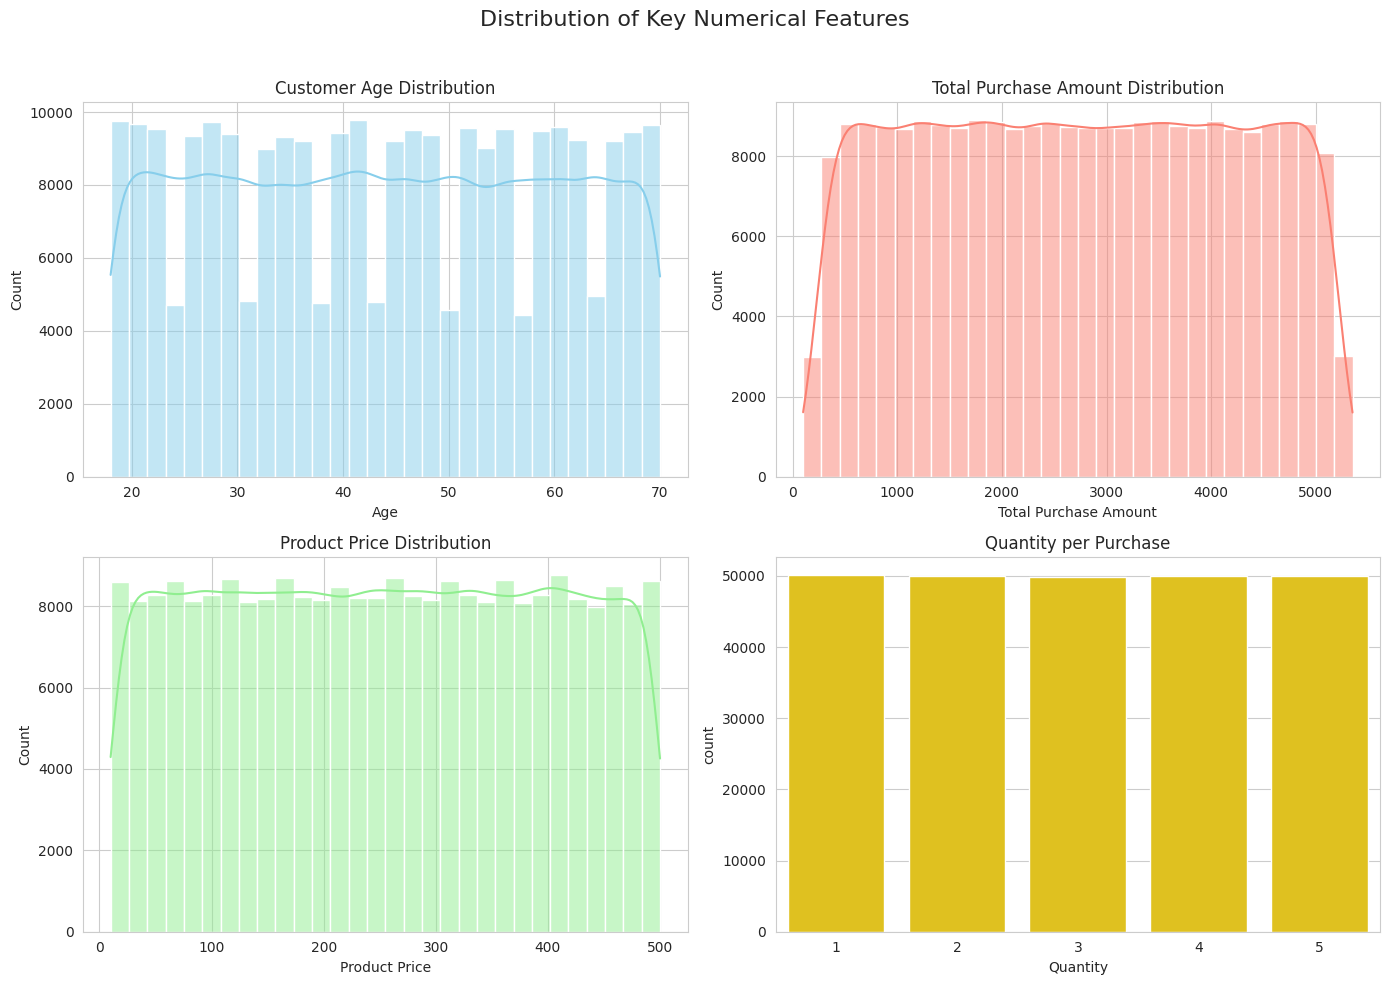

In [24]:
# Customer Behavior Analysis: This cell visualizes key distributions to understand how consumers interact with products and services.
# The plots below illustrate purchasing patterns, preferences, and demographics, which are crucial for tailoring marketing strategies, improving product offerings, and enhancing the overall customer experience.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid")

# Create histograms for the key numerical variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

# Age Distribution
sns.histplot(df_ratios['Age'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Customer Age Distribution')

# Total Purchase Amount Distribution
sns.histplot(df_ratios['Total Purchase Amount'], bins=30, kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Total Purchase Amount Distribution')

# Product Price Distribution
sns.histplot(df_ratios['Product Price'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Product Price Distribution')

# Quantity Distribution
sns.countplot(x=df_ratios['Quantity'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Quantity per Purchase')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for the title
plt.show()

In [25]:
import numpy as np

# 1. Ensure Purchase Date is datetime (Run this again just to be safe)
df_ratios['Purchase Date'] = pd.to_datetime(df_ratios['Purchase Date'])

# 2. Determine the analysis reference date
# We use the maximum date in the dataset + 1 day
latest_date = df_ratios['Purchase Date'].max()
NOW = latest_date + pd.Timedelta(days=1)

print(f"Latest Transaction Date: {latest_date.date()}")
print(f"RFM Reference Date: {NOW.date()}")

Latest Transaction Date: 2023-09-15
RFM Reference Date: 2023-09-16


In [26]:
# Calculate RFM metrics
rfm_df = df_ratios.groupby('Customer ID').agg(
    # Recency: Find the latest purchase date, then calculate days since NOW
    Recency=('Purchase Date', lambda x: (NOW - x.max()).days),

    # Frequency: Count the number of unique purchase dates (or rows/transactions)
    Frequency=('Purchase Date', 'count'),

    # Monetary: Sum the total purchase amount
    Monetary=('Total Purchase Amount', 'sum')
).reset_index()

print("\n### First 5 Rows of the Calculated RFM DataFrame ###")
print(rfm_df.head())
print(f"\nTotal Customers Analyzed: {rfm_df.shape[0]}")


### First 5 Rows of the Calculated RFM DataFrame ###
   Customer ID  Recency  Frequency  Monetary
0            1       58          1      3491
1            2      299          3      7988
2            3       89          8     22587
3            4      127          4      8715
4            5      171          8     12524

Total Customers Analyzed: 49673


In [27]:
import numpy as np

# 1. Define scoring functions
# We use 4 bins (quartiles) for simplicity.

def score_r(x, quantiles):
    # Recency: Lower value (more recent) is better, so the score is REVERSED
    return 4 if x <= quantiles[0.25] else \
           3 if x <= quantiles[0.50] else \
           2 if x <= quantiles[0.75] else 1

def score_fm(x, quantiles):
    # Frequency/Monetary: Higher value is better (straight scoring)
    return 1 if x <= quantiles[0.25] else \
           2 if x <= quantiles[0.50] else \
           3 if x <= quantiles[0.75] else 4

# 2. Calculate the quartiles for R, F, and M
# This helps establish the scoring thresholds
rfm_quartiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# 3. Apply scoring functions to create score columns
rfm_df['R_Score'] = rfm_df['Recency'].apply(score_r, args=(rfm_quartiles['Recency'],))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(score_fm, args=(rfm_quartiles['Frequency'],))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(score_fm, args=(rfm_quartiles['Monetary'],))

# 4. Combine scores into a segment string
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# 5. Define customer segments (e.g., Champions, At Risk)
def segment_customer(rfm):
    # High Value Customers (Top tier)
    if rfm in ['444', '443', '434', '344']:
        return 'Champion'
    # Loyal Customers (Frequent, good recency)
    elif rfm in ['433', '334', '333', '423', '323']:
        return 'Loyal Customer'
    # Recent Customers (High R, low F/M)
    elif rfm in ['411', '311', '422', '322']:
        return 'New/Recent Customer'
    # At Risk (Good F/M, poor R)
    elif rfm in ['244', '144', '234', '134', '143', '243']:
        return 'At Risk'
    # Need Attention (Below average R, F, M)
    elif rfm in ['222', '212', '211', '122', '112']:
        return 'Need Attention'
    # Lost (Poor R, F, M)
    elif rfm in ['111', '121', '211']:
        return 'Lost Customer'
    # Any other combination
    else:
        return 'Other'

rfm_df['RFM_Level'] = rfm_df['RFM_Segment'].apply(segment_customer)

print("\n### RFM Scoring and Segmentation Results (First 5 Rows) ###")
print(rfm_df[['Customer ID', 'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Level']].head())
print("\n### Distribution of Customer Segments ###")
print(rfm_df['RFM_Level'].value_counts(normalize=True).map('{:.2f}%'.format))


### RFM Scoring and Segmentation Results (First 5 Rows) ###
   Customer ID  Recency  Frequency  Monetary RFM_Segment            RFM_Level
0            1       58          1      3491         411  New/Recent Customer
1            2      299          3      7988         211       Need Attention
2            3       89          8     22587         344             Champion
3            4      127          4      8715         321                Other
4            5      171          8     12524         342                Other

### Distribution of Customer Segments ###
RFM_Level
Other                  0.22%
Need Attention         0.16%
Champion               0.16%
New/Recent Customer    0.13%
Loyal Customer         0.12%
Lost Customer          0.11%
At Risk                0.09%
Name: proportion, dtype: object


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Data Preparation and RFM Calculation ---
# Assuming df_ratios is already loaded and cleaned:
# 1. Ensure Purchase Date is datetime
df_ratios['Purchase Date'] = pd.to_datetime(df_ratios['Purchase Date'])
# 2. Fill missing 'Returns' with 0 (Assuming NaN means 'No Return')
df_ratios['Returns'] = df_ratios['Returns'].fillna(0)

# Determine the analysis reference date (one day after the last purchase)
latest_date = df_ratios['Purchase Date'].max()
NOW = latest_date + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm_df = df_ratios.groupby('Customer ID').agg(
    Recency=('Purchase Date', lambda x: (NOW - x.max()).days),
    Frequency=('Purchase Date', 'count'),
    Monetary=('Total Purchase Amount', 'sum')
).reset_index()

# --- Step 2: RFM Scoring and Segmentation ---
# Define scoring functions (using 4 quartiles for scores 1 to 4)
def score_r(x, quantiles):
    # Recency: Lower Recency (more recent) is better -> Score is reversed
    return 4 if x <= quantiles[0.25] else 3 if x <= quantiles[0.50] else 2 if x <= quantiles[0.75] else 1

def score_fm(x, quantiles):
    # Frequency/Monetary: Higher value is better
    return 1 if x <= quantiles[0.25] else 2 if x <= quantiles[0.50] else 3 if x <= quantiles[0.75] else 4

# Calculate quartiles
rfm_quartiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# Apply scoring
rfm_df['R_Score'] = rfm_df['Recency'].apply(score_r, args=(rfm_quartiles['Recency'],))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(score_fm, args=(rfm_quartiles['Frequency'],))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(score_fm, args=(rfm_quartiles['Monetary'],))
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Define Segments
def segment_customer(rfm):
    if rfm in ['444', '443', '434', '344']:
        return 'Champion' # Best customers: bought recently, often, and spent the most
    elif rfm in ['433', '334', '333', '423', '323']:
        return 'Loyal Customer' # Good customers, medium spending
    elif rfm in ['411', '311', '422', '322']:
        return 'New/Recent Customer' # Bought recently, but low frequency/monetary
    elif rfm in ['244', '144', '234', '134', '143', '243']:
        return 'At Risk' # Used to be good, but haven't bought recently (low R)
    elif rfm in ['222', '212', '211', '122', '112']:
        return 'Need Attention' # Below average across the board
    elif rfm in ['111', '121', '211']:
        return 'Lost Customer' # Worst R, F, M
    else:
        return 'Other'

rfm_df['RFM_Level'] = rfm_df['RFM_Segment'].apply(segment_customer)

# --- Step 3: Visualization and Final Analysis ---
sns.set_style("whitegrid")
segment_counts = rfm_df['RFM_Level'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title('Distribution of Customer Segments by RFM Score', fontsize=16)
plt.xlabel('Customer Segment (RFM Level)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rfm_segment_distribution.png')
plt.close()

print("Bar chart saved as 'rfm_segment_distribution.png'.")

# Calculate mean R, F, M for each segment
segment_analysis = rfm_df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Customer Count'})

segment_analysis_formatted = segment_analysis.sort_values(by='Monetary', ascending=False)
segment_analysis_formatted['Recency'] = segment_analysis_formatted['Recency'].round(0).astype(int)
segment_analysis_formatted['Frequency'] = segment_analysis_formatted['Frequency'].round(1)
segment_analysis_formatted['Monetary'] = segment_analysis_formatted['Monetary'].round(0).astype(int)

print("\n### Mean Statistics per Customer Segment (R, F, M) ###")
print(segment_analysis_formatted)

Bar chart saved as 'rfm_segment_distribution.png'.

### Mean Statistics per Customer Segment (R, F, M) ###
                     Recency  Frequency  Monetary  Customer Count
RFM_Level                                                        
Champion                  69        8.1     23016            8000
At Risk                  324        7.5     21405            4526
Loyal Customer            90        5.3     15824            5915
Other                    258        5.0     13094           11023
Need Attention           386        3.5      9365            8184
New/Recent Customer       88        3.6      8753            6474
Lost Customer            696        2.3      5240            5551


/tmp/ipython-input-3178024066.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


In [29]:
import numpy as np

# Select the relevant columns and group by the Churn flag
churn_analysis = df_ratios.groupby('Churn').agg(
    # Recency (Days since last purchase, calculated from the original df)
    Mean_Recency=('Purchase Date', lambda x: (df_ratios['Purchase Date'].max() - x.max()).days),
    # Mean Frequency (Mean number of purchases per customer in that group)
    Mean_Frequency=('Customer ID', 'count'), # This needs careful handling, will calculate mean frequency later
    # Mean Monetary Value (Mean total purchase amount)
    Mean_Monetary=('Total Purchase Amount', 'mean'),
    # Mean Age
    Mean_Age=('Age', 'mean')
).reset_index()

# Note: The calculation for Mean_Frequency in a grouped dataframe can be tricky
# without first calculating per-customer frequency. For simplicity and clarity
# in this direct grouping, we'll focus on Recency, Monetary, and Age.

# Let's adjust the aggregation to correctly show mean monetary and mean age per transaction,
# and focus on the overall average for each group.

churn_analysis = df_ratios.groupby('Churn').agg(
    Mean_Purchase_Amount=('Total Purchase Amount', 'mean'),
    Mean_Product_Price=('Product Price', 'mean'),
    Mean_Age=('Age', 'mean'),
    Total_Transactions=('Customer ID', 'count')
)

# Also look at the proportion of customers who churned
churn_proportion = df_ratios['Churn'].value_counts(normalize=True).map('{:.2f}%'.format)

print("### Transaction-Level Mean Metrics by Churn Status ###")
print(churn_analysis.round(2))
print("\n### Overall Churn Proportion ###")
print(churn_proportion)

### Transaction-Level Mean Metrics by Churn Status ###
       Mean_Purchase_Amount  Mean_Product_Price  Mean_Age  Total_Transactions
Churn                                                                        
0                   2724.82              254.78     43.99              200126
1                   2727.60              254.19     43.76               49874

### Overall Churn Proportion ###
Churn
0    0.80%
1    0.20%
Name: proportion, dtype: object


In [30]:
import pandas as pd

# 1. Select the relevant columns from the original data (df_ratios)
# We need the Churn status and Customer ID. We can take the maximum/last Churn
# status for each customer, assuming Churn is a final status (1 or 0).
churn_status = df_ratios.groupby('Customer ID')['Churn'].max().reset_index()

# 2. Merge the RFM DataFrame (rfm_df) with the Churn Status
rfm_churn = pd.merge(rfm_df, churn_status, on='Customer ID', how='left')

# 3. Analyze the mean RFM metrics based on Churn status
final_churn_metrics = rfm_churn.groupby('Churn').agg(
    Mean_Recency=('Recency', 'mean'),
    Mean_Frequency=('Frequency', 'mean'),
    Mean_Monetary=('Monetary', 'mean'),
    Customer_Count=('Customer ID', 'count')
)

print("\n### Customer-Level RFM Metrics by Churn Status ###")
print(final_churn_metrics.round(1))



### Customer-Level RFM Metrics by Churn Status ###
       Mean_Recency  Mean_Frequency  Mean_Monetary  Customer_Count
Churn                                                             
0             261.9             5.0        13725.0           39731
1             259.6             5.0        13683.0            9942


In [31]:
import pandas as pd
import numpy as np

# --- 1. Data Preparation (Ensure date and returns are processed) ---
# Assuming df_ratios is already loaded
df_ratios['Purchase Date'] = pd.to_datetime(df_ratios['Purchase Date'])
df_ratios['Returns'] = df_ratios['Returns'].fillna(0)

# --- 2. RFM Calculation ---
latest_date = df_ratios['Purchase Date'].max()
NOW = latest_date + pd.Timedelta(days=1)

# Calculate RFM metrics per Customer ID
rfm_df = df_ratios.groupby('Customer ID').agg(
    Recency=('Purchase Date', lambda x: (NOW - x.max()).days),
    Frequency=('Purchase Date', 'count'),
    Monetary=('Total Purchase Amount', 'sum')
).reset_index()

# --- 3. Merge RFM with Churn Status ---
# Get the final Churn status (max ensures we get the '1' if the customer churned at any point)
churn_status = df_ratios.groupby('Customer ID')['Churn'].max().reset_index()

# Merge RFM data with Churn status
rfm_churn = pd.merge(rfm_df, churn_status, on='Customer ID', how='left')

# --- 4. Final Analysis: Compare RFM Metrics by Churn Status ---
final_churn_metrics = rfm_churn.groupby('Churn').agg(
    Mean_Recency=('Recency', 'mean'),
    Mean_Frequency=('Frequency', 'mean'),
    Mean_Monetary=('Monetary', 'mean'),
    Customer_Count=('Customer ID', 'count')
)

# Format the output for clear presentation
final_churn_metrics_formatted = final_churn_metrics.round(0)
final_churn_metrics_formatted['Mean_Recency'] = final_churn_metrics_formatted['Mean_Recency'].astype(int)
final_churn_metrics_formatted['Mean_Monetary'] = final_churn_metrics_formatted['Mean_Monetary'].astype(int)
final_churn_metrics_formatted['Customer_Count'] = final_churn_metrics_formatted['Customer_Count'].astype(int)


print("\n### Customer-Level RFM Metrics by Churn Status ###")
print(final_churn_metrics_formatted)


### Customer-Level RFM Metrics by Churn Status ###
       Mean_Recency  Mean_Frequency  Mean_Monetary  Customer_Count
Churn                                                             
0               262             5.0          13725           39731
1               260             5.0          13683            9942


In [32]:
import pandas as pd
import numpy as np

# 1. Convert Date and Handle Missing Values
df_large['Purchase Date'] = pd.to_datetime(df_large['Purchase Date'])
df_large['Returns'] = df_large['Returns'].fillna(0) # Assuming NaN means No Return

# 2. Handle Redundancy (assuming the same redundancy exists in df_large)
# Drop one of the redundant Age columns if present
if 'Customer Age' in df_large.columns:
    df_large = df_large.drop(columns=['Customer Age'])
    print("Redundant 'Customer Age' column dropped from df_large.")

print("df_large preprocessing complete.")

Redundant 'Customer Age' column dropped from df_large.
df_large preprocessing complete.


In [33]:
latest_date_large = df_large['Purchase Date'].max()
NOW_large = latest_date_large + pd.Timedelta(days=1)

# Calculate RFM metrics per Customer ID for the large dataset
rfm_large_df = df_large.groupby('Customer ID').agg(
    Recency=('Purchase Date', lambda x: (NOW_large - x.max()).days),
    Frequency=('Purchase Date', 'count'),
    Monetary=('Total Purchase Amount', 'sum')
).reset_index()

print("\nRFM calculation for df_large complete.")
print(f"Total Unique Customers in df_large: {rfm_large_df.shape[0]}")


RFM calculation for df_large complete.
Total Unique Customers in df_large: 49661


In [34]:
# Assuming score_r and score_fm functions are defined in your environment

# Calculate quartiles for df_large (these will be different from df_ratios)
rfm_quartiles_large = rfm_large_df[['Recency', 'Frequency', 'Monetary']].quantile([0.25, 0.5, 0.75]).to_dict()

# Apply scoring
rfm_large_df['R_Score'] = rfm_large_df['Recency'].apply(score_r, args=(rfm_quartiles_large['Recency'],))
rfm_large_df['F_Score'] = rfm_large_df['Frequency'].apply(score_fm, args=(rfm_quartiles_large['Frequency'],))
rfm_large_df['M_Score'] = rfm_large_df['Monetary'].apply(score_fm, args=(rfm_quartiles_large['Monetary'],))
rfm_large_df['RFM_Segment'] = rfm_large_df['R_Score'].astype(str) + rfm_large_df['F_Score'].astype(str) + rfm_large_df['M_Score'].astype(str)

# Apply segment classification (assuming segment_customer function is also defined)
# rfm_large_df['RFM_Level'] = rfm_large_df['RFM_Segment'].apply(segment_customer)

print("\nRFM Scoring and Segmentation for df_large complete.")


RFM Scoring and Segmentation for df_large complete.


In [35]:
# Get the final Churn status for each unique customer ID from df_large
churn_status_large = df_large.groupby('Customer ID')['Churn'].max().reset_index()

# Merge RFM data with Churn status
rfm_churn_large = pd.merge(rfm_large_df, churn_status_large, on='Customer ID', how='left')

# Analyze the mean RFM metrics based on Churn status
final_churn_metrics_large = rfm_churn_large.groupby('Churn').agg(
    Mean_Recency=('Recency', 'mean'),
    Mean_Frequency=('Frequency', 'mean'),
    Mean_Monetary=('Monetary', 'mean'),
    Customer_Count=('Customer ID', 'count')
)

print("\n### Final Churn vs. RFM Analysis (df_large) ###")
print(final_churn_metrics_large.round(0))


### Final Churn vs. RFM Analysis (df_large) ###
       Mean_Recency  Mean_Frequency  Mean_Monetary  Customer_Count
Churn                                                             
0             262.0             5.0        13707.0           39732
1             263.0             5.0        13770.0            9929
